In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [83]:
from pathlib import Path
from PIL import Image

root = Path(r"c:\Users\vatsa\Downloads\CNN_Project_DogsCatsClassification\PetImages")
fixed_count = 0
deleted_count = 0

for p in root.rglob("*.jpg"):
    try:
        with Image.open(p) as img:  # ensures file is closed automatically
            rgb = img.convert("RGB")
            rgb.save(p, "JPEG")
            fixed_count += 1
    except Exception as e:
        print("Deleting bad file:", p, "->", e)
        try:
            p.unlink()  # delete only if truly bad
            deleted_count += 1
        except Exception as e2:
            print("Failed to delete:", p, "->", e2)

print(f"Fixed images: {fixed_count}, Deleted bad images: {deleted_count}")


Deleting bad file: c:\Users\vatsa\Downloads\CNN_Project_DogsCatsClassification\PetImages\Cat\11095.jpg -> [Errno 22] Invalid argument: 'c:\\Users\\vatsa\\Downloads\\CNN_Project_DogsCatsClassification\\PetImages\\Cat\\11095.jpg'
Failed to delete: c:\Users\vatsa\Downloads\CNN_Project_DogsCatsClassification\PetImages\Cat\11095.jpg -> [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\vatsa\\Downloads\\CNN_Project_DogsCatsClassification\\PetImages\\Cat\\11095.jpg'
Deleting bad file: c:\Users\vatsa\Downloads\CNN_Project_DogsCatsClassification\PetImages\Cat\12080.jpg -> [Errno 22] Invalid argument: 'c:\\Users\\vatsa\\Downloads\\CNN_Project_DogsCatsClassification\\PetImages\\Cat\\12080.jpg'
Failed to delete: c:\Users\vatsa\Downloads\CNN_Project_DogsCatsClassification\PetImages\Cat\12080.jpg -> [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\vatsa\\Downloads\\CNN_Project_DogsCatsCla

In [2]:
directory='PetImages'
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory=directory,
    labels='inferred',
    batch_size=32,
    image_size=(256,256),
    validation_split=0.2,
    subset='training',
    seed=123,
    smart_resize=True
)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory=directory,
    labels='inferred',
    batch_size=32,
    image_size=(256,256),
    validation_split=0.2,
    subset='validation',
    seed=123,
    smart_resize=True
)


Found 24955 files belonging to 2 classes.
Using 19964 files for training.
Found 24955 files belonging to 2 classes.
Using 4991 files for validation.


In [3]:
print(train_ds.class_names)
print(val_ds.class_names)

['Cat', 'Dog']
['Cat', 'Dog']


In [4]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

['Cat', 'Dog']


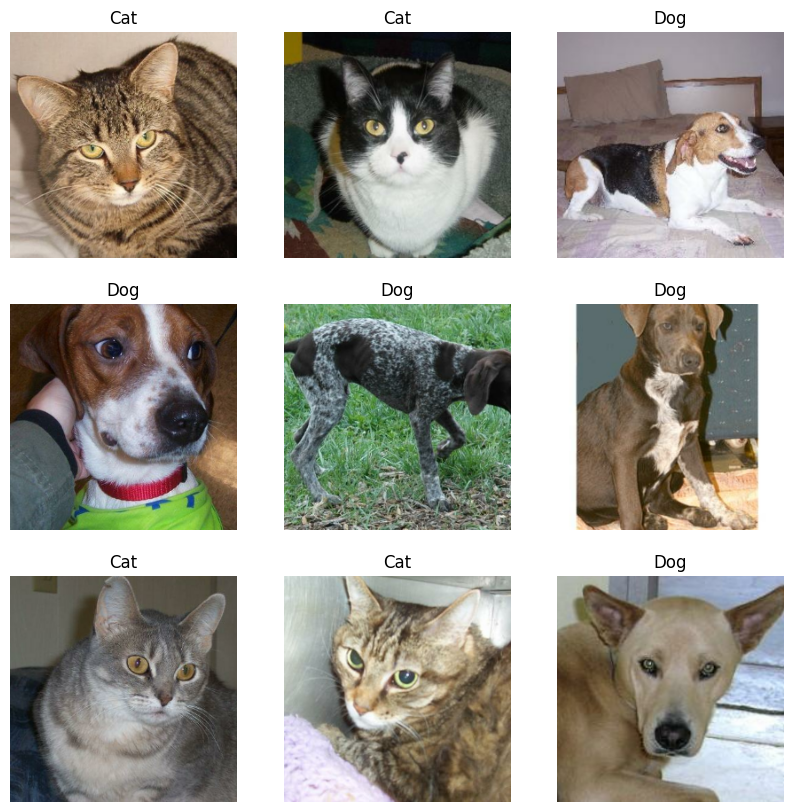

In [5]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:

for images, labels in train_ds.take(1):
  print(images)



tf.Tensor(
[[[[  9.160915    9.160915   11.160915 ]
   [  8.832031    8.832031   10.832031 ]
   [  8.0487175   8.0487175  10.0487175]
   ...
   [158.45464   122.454636   87.61479  ]
   [157.33594   121.33594    87.33594  ]
   [157.33594   121.33594    89.16797  ]]

  [[ 11.419922   11.167969   13.923828 ]
   [ 10.251953   10.         12.755859 ]
   [  8.978184    8.726231   11.48209  ]
   ...
   [160.72623   124.72623    89.88638  ]
   [161.25195   125.25195    91.25195  ]
   [161.25195   125.25195    92.6224   ]]

  [[ 13.755859   12.755859   17.75586  ]
   [ 12.48209    11.48209    16.48209  ]
   [ 10.580078    9.580078   14.580078 ]
   ...
   [160.67297   124.67298    89.83314  ]
   [161.16016   125.16016    91.16016  ]
   [161.16016   125.16016    91.16016  ]]

  ...

  [[ 23.746426   43.746426   77.6837   ]
   [ 23.958027   43.958027   79.46193  ]
   [ 17.733528   37.313606   75.57337  ]
   ...
   [159.45041   147.11392   126.1234   ]
   [ 76.490845   65.09274    44.39905  ]
   [ 

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy'])

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [11]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7,
  callbacks=[early_stopping]
)

Epoch 1/7
624/624 [==============================] - 108s 150ms/step - loss: 0.6890 - accuracy: 0.5876 - val_loss: 0.6181 - val_accuracy: 0.6301
Epoch 2/7
624/624 [==============================] - 162s 260ms/step - loss: 0.5951 - accuracy: 0.6748 - val_loss: 0.5502 - val_accuracy: 0.7183
Epoch 3/7
624/624 [==============================] - 174s 279ms/step - loss: 0.5298 - accuracy: 0.7309 - val_loss: 0.5005 - val_accuracy: 0.7550
Epoch 4/7
624/624 [==============================] - 208s 333ms/step - loss: 0.4696 - accuracy: 0.7754 - val_loss: 0.4608 - val_accuracy: 0.7838
Epoch 5/7
624/624 [==============================] - 553s 888ms/step - loss: 0.4259 - accuracy: 0.8052 - val_loss: 0.4751 - val_accuracy: 0.7670
Epoch 6/7
624/624 [==============================] - 249s 399ms/step - loss: 0.3781 - accuracy: 0.8320 - val_loss: 0.4542 - val_accuracy: 0.7876
Epoch 7/7
624/624 [==============================] - 263s 422ms/step - loss: 0.3448 - accuracy: 0.8496 - val_loss: 0.4384 - val_ac

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [13]:
model.save('CatsAndDogClassification.h5')